In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [16]:
df = pd.read_csv('/content/Wine_clust.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [18]:
df.isnull().sum()

,0
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcanity,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0
Color_Intensity,0


In [19]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [35]:
X = df[['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
         'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
         'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Step 4: K-Means Clustering

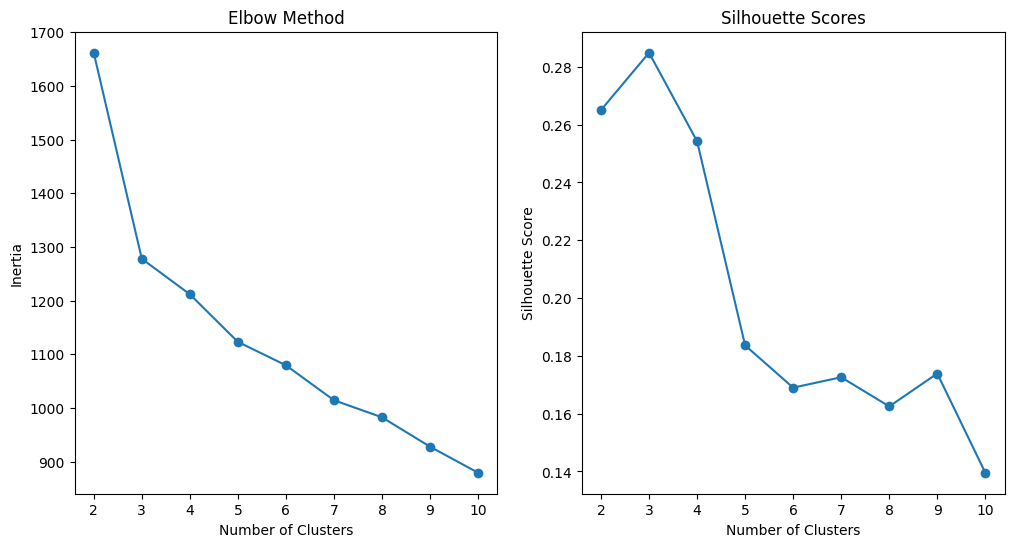

In [20]:
inertia = []
silhouette_scores = []

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

#Elbow Method
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

#Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
# Create K-Means model with optimum clusters
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original dataset
df['KMeans_Cluster'] = kmeans_labels

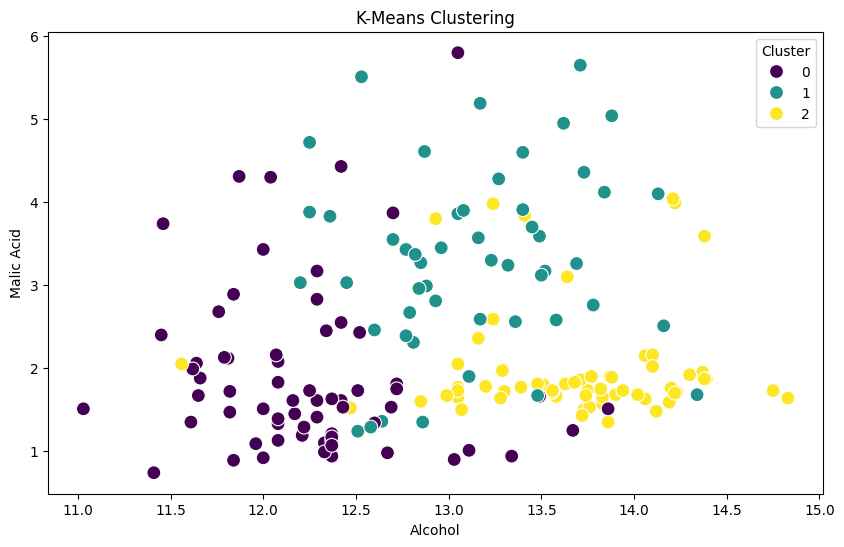

In [21]:
# Visualizing K-Means Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Alcohol'], y=df['Malic_Acid'], hue=df['KMeans_Cluster'], palette='viridis', s=100)
plt.title('K-Means Clustering')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.legend(title='Cluster')
plt.show()

# Hierarchical Clustering

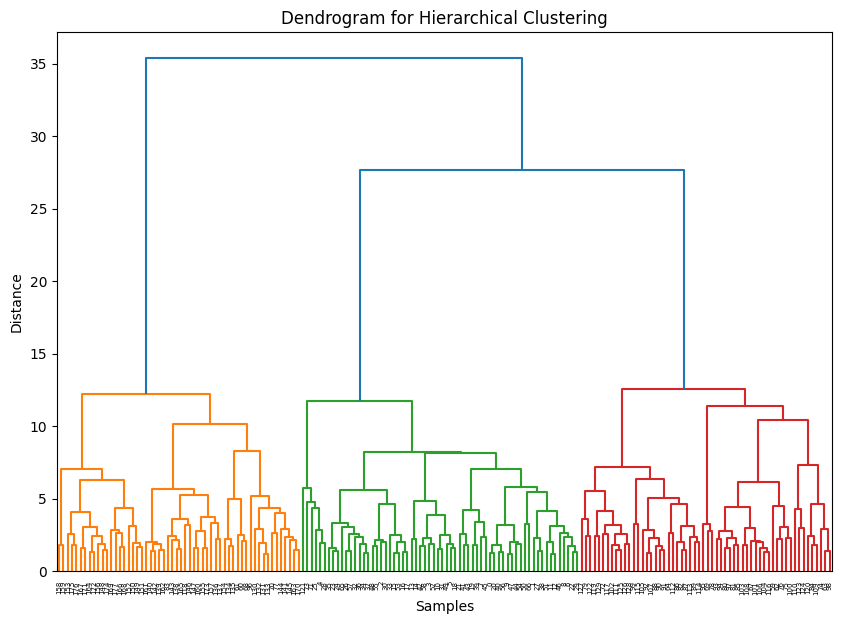

In [34]:
from scipy.cluster.hierarchy import dendrogram, linkage
# Create a linkage matrix
Z = linkage(X_scaled, method='ward')

# Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [ ]:
# Create Hierarchical Clustering model
hierarchical = AgglomerativeClustering(n_clusters=optimal_k)
hierarchical_labels = hierarchical.fit_predict(X_scaled)

df['Hierarchical_Cluster'] = hierarchical_labels

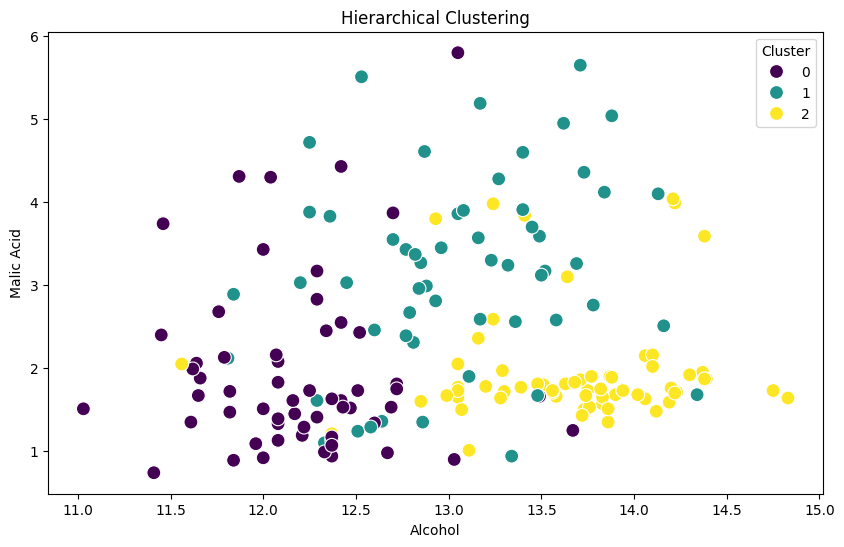

In [23]:
# Visualizing Hierarchical Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Alcohol'], y=df['Malic_Acid'], hue=df['Hierarchical_Cluster'], palette='viridis', s=100)
plt.title('Hierarchical Clustering')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.legend(title='Cluster')
plt.show()


# DBSCAN Clustering

In [24]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Add cluster labels to the original dataset
df['DBSCAN_Cluster'] = dbscan_labels

Text(0.5, 0, 'Alcohol')

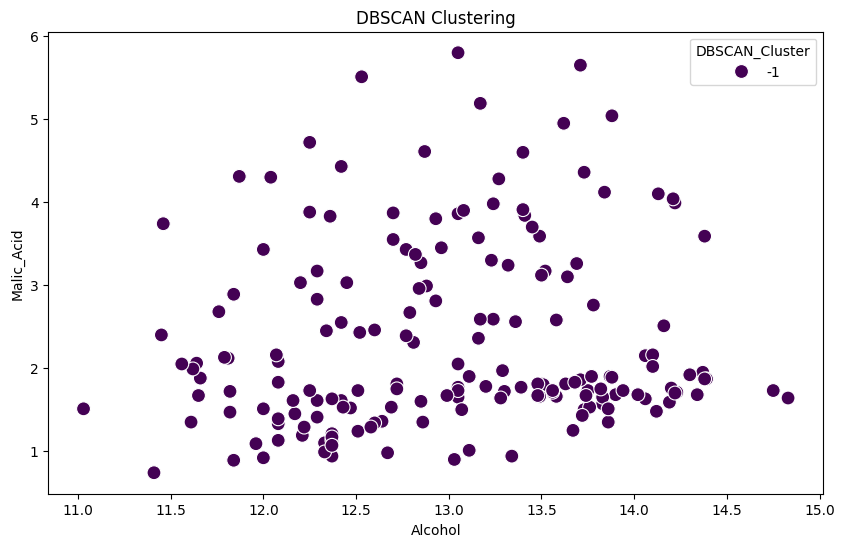

In [25]:
# Visualizing DBSCAN Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Alcohol'], y=df['Malic_Acid'], hue=df['DBSCAN_Cluster'], palette='viridis', s=100)
plt.title('DBSCAN Clustering')
plt.xlabel('Alcohol')

In [26]:
# Get the centroids of the clusters
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_df = pd.DataFrame(centroids, columns=X.columns)
print("Cluster Centroids:\n", centroid_df)

Cluster Centroids:
      Alcohol  Malic_Acid       Ash  Ash_Alcanity   Magnesium  Total_Phenols  \
0  12.250923    1.897385  2.231231     20.063077   92.738462       2.247692   
1  13.134118    3.307255  2.417647     21.241176   98.666667       1.683922   
2  13.676774    1.997903  2.466290     17.462903  107.967742       2.847581   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
0    2.050000              0.357692         1.624154         2.973077   
1    0.818824              0.451961         1.145882         7.234706   
2    3.003226              0.292097         1.922097         5.453548   

        Hue     OD280      Proline  
0  1.062708  2.803385   510.169231  
1  0.691961  1.696667   619.058824  
2  1.065484  3.163387  1100.225806  


In [27]:
# Group by KMeans cluster and calculate mean
cluster_summary = df.groupby('KMeans_Cluster').mean()
print("Cluster Summary Statistics:\n", cluster_summary)

Cluster Summary Statistics:
                   Alcohol  Malic_Acid       Ash  Ash_Alcanity   Magnesium  \
KMeans_Cluster                                                              
0               12.250923    1.897385  2.231231     20.063077   92.738462   
1               13.134118    3.307255  2.417647     21.241176   98.666667   
2               13.676774    1.997903  2.466290     17.462903  107.967742   

                Total_Phenols  Flavanoids  Nonflavanoid_Phenols  \
KMeans_Cluster                                                    
0                    2.247692    2.050000              0.357692   
1                    1.683922    0.818824              0.451961   
2                    2.847581    3.003226              0.292097   

                Proanthocyanins  Color_Intensity       Hue     OD280  \
KMeans_Cluster                                                         
0                      1.624154         2.973077  1.062708  2.803385   
1                      1.145882  

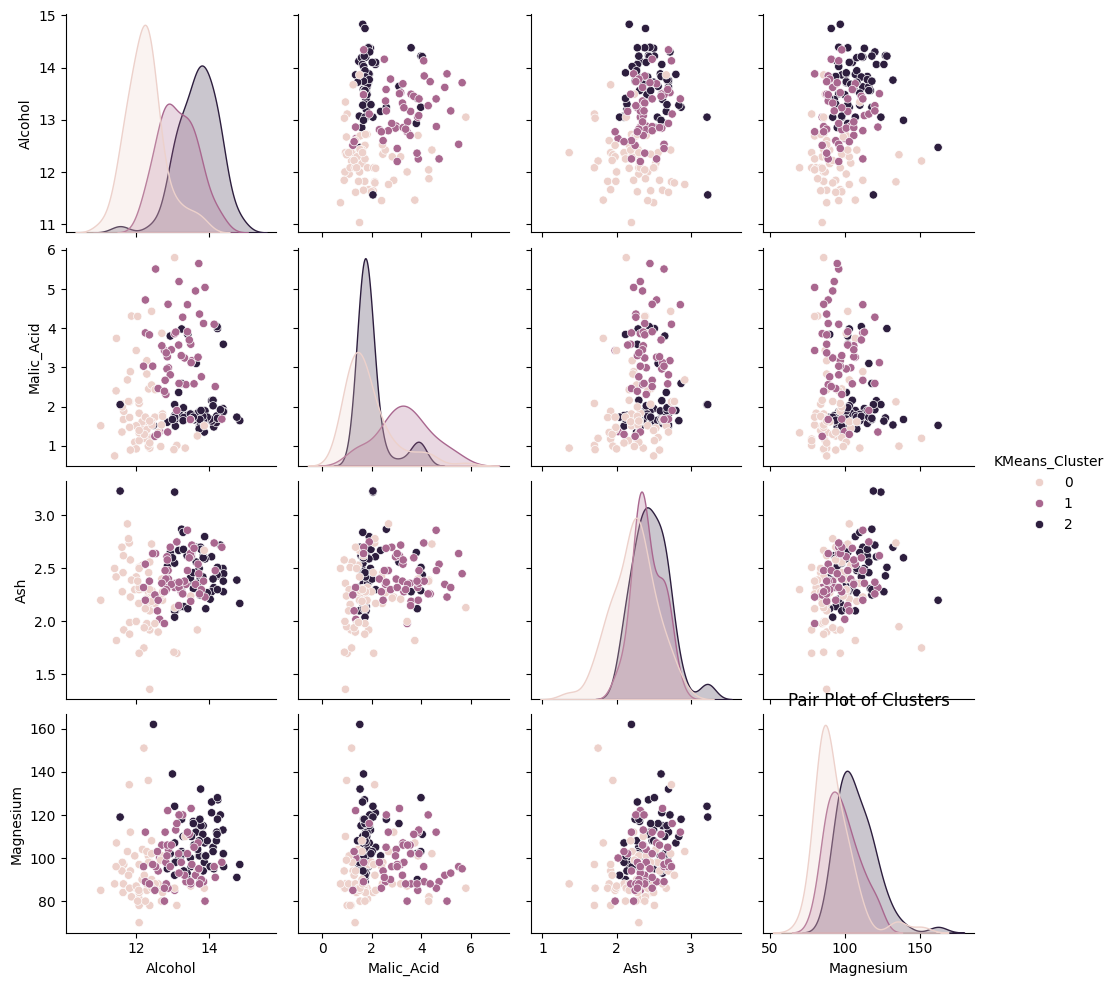

In [38]:
sns.pairplot(df, hue='KMeans_Cluster', vars=['Alcohol', 'Malic_Acid', 'Ash', 'Magnesium'])
plt.title('Pair Plot of Clusters')
plt.show()

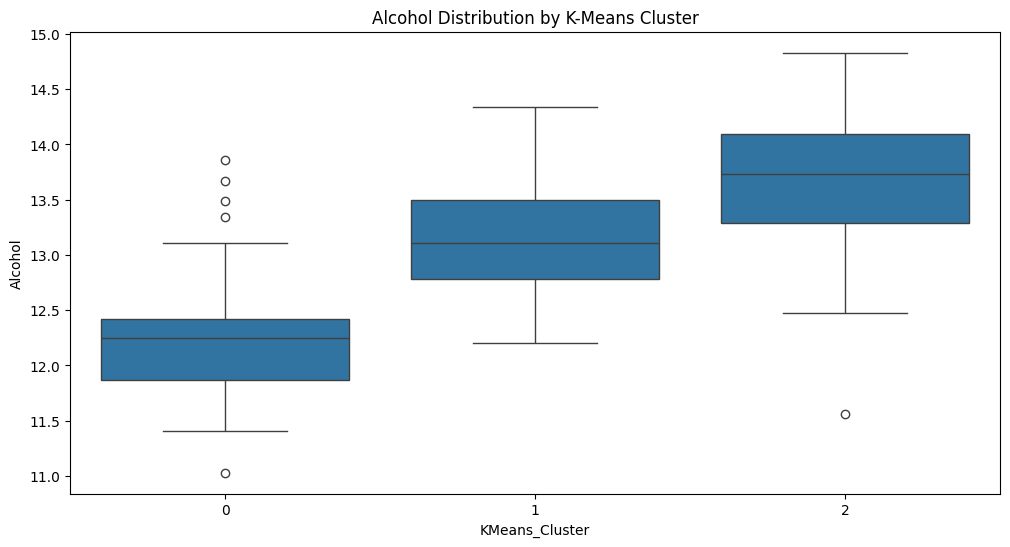

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='KMeans_Cluster', y='Alcohol', data=df)
plt.title('Alcohol Distribution by K-Means Cluster')
plt.show()

In [30]:
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
hierarchical_silhouette = silhouette_score(X_scaled, hierarchical_labels)
dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1

print(f"K-Means Silhouette Score: {kmeans_silhouette}")
print(f"Hierarchical Silhouette Score: {hierarchical_silhouette}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")

K-Means Silhouette Score: 0.2848589191898987
Hierarchical Silhouette Score: 0.2774439826952265
DBSCAN Silhouette Score: -1


K-Means:A score of 0.2849 suggests that the K-Means clustering has a moderate level of separation between clusters. While it's not very high, it indicates that there is some degree of clustering structure present.

Hierarchical: Similar to K-Means, a score of 0.2774 indicates that the hierarchical clustering also has a moderate level of separation between clusters, but it is slightly lower than that of K-Means. This suggests that the clusters formed by hierarchical clustering are not as distinct as those formed by K-Means.

DBSCAN:A silhouette score of -1 indicates that all points were not clustered.

In [31]:
df.to_csv('Wine_Clustered.csv', index=False)